<h1 style="font-size: 40px; margin-bottom: 0px;">2.2 Statistical analysis with Python</h1>

<p style="margin-top: 15px;"><strong>And more plotting (maybe)</strong></p>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

Today, we'll be working with quantitative data, nominal data, and ordinal data in order to practice statistical analysis in Python. We'll be starting today with yesterday's second in class exercise and incorporating it into today's lesson.

learning the different functions needed to calculate descriptive statistics and to perform different statistical tests. We'll be continuing to build upon what we've learned previously with an initial exercise that will prepare a dataset for us.

<strong>Learning objectives:</strong>
<ul>
    <li>Continue to practice using functions and reading documentation</li>
    <li>Continue to practice specifying arguments for functions</li>
    <li>Additional plotting practice</li>
    <li>Practice identifying object types</li>
    <li>Learn methods to calculate descriptive statistics</li>
    <li>Perform pair-wise comparisons between datasets</li>
</ul>

<strong>As usual, we want to start by importing the necessary packages that we'll need for today's lesson:</strong>
<ul>
    <li>NumPy</li>
    <li>pandas</li>
    <li>matplotlib.pyplot</li>
    <li>scipy.stats (as stats)</li>
    <li>seaborn</li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns #You'll need to update seaborn if importing it gives an error.

<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #1 - Quantitative Data</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

As you may remember from lecture, quantitative data (sometimes referred to as quantitative variables) is data that holds some measurable value, such as cell counts, height, and fluorescence intensity, and it can come in two forms:
<ul>
    <li><strong>Discrete</strong> - where the measurement cannot be represented with decimals, such as cell counts</li>
    <li><strong>Continuous</strong> - where the data can be represented by decimals or fractions</li>
</ul>

In this first exercise, we'll use our tumor weights and tumor volumes dataset. I've tidied up the data and saved it as a CSV file for this lesson. You'll find it titled TUMOR_VOL_WEIGHT.csv in your copy of the class directory.


<strong>Functions and attributes that we'll use in this exercise are:</strong>
<ul>
    <li><mark style="background-color: #EEEEEE;"><strong>pd.read_csv()</strong></mark> - to import our .csv file</li>
    <li><mark style="background-color: #EEEEEE;"><strong>print()</strong></mark> - to perform sanity checks</li>
    <li><mark style="background-color: #EEEEEE;"><strong>type()</strong></mark> - to check data types</li>
    <li><mark style="background-color: #EEEEEE;"><strong>pd.DataFrame.loc</strong></mark>
    <li><mark style="background-color: #EEEEEE;"><strong>pd.DataFrame.mean()</strong></mark> - to calculate the mean of elements along a specified axis in a DataFrame</li>
    <li><mark style="background-color: #EEEEEE;"><strong>pd.DataFrame.median()</strong></mark> - to calculate the median of elements along a specified axis in a DataFrame</li>
        <li><mark style="background-color: #EEEEEE;"><strong>pd.DataFrame.std()</strong></mark> - to calculate the standard deviation of elements along a specified axis in a DataFrame</li>
</ul>

<h3>1. Import data, assign it to a variable, and take a look to see if it imported correctly and check its type.</h3>

In [2]:
#Import data using read_csv function and check
tumor_stats = pd.read_csv('TUMOR_VOL_WEIGHT.csv')
print(tumor_stats)
print(type(tumor_stats))

    control_weight  control_volume  ko_weight  ko_volume
0           0.2225     1356.480000     0.0239     200.96
1           0.1016      502.400000     0.0476     439.60
2           0.2888     2411.520000     0.0122     109.90
3           0.0778      439.600000     0.0754     376.80
4           0.0802      602.880000        NaN        NaN
5           0.8180      401.920000        NaN        NaN
6           0.6800      133.973333        NaN        NaN
7           0.0209      263.760000        NaN        NaN
8           0.1323     1172.266667        NaN        NaN
9           0.1293      753.600000        NaN        NaN
10          0.3656     2461.760000        NaN        NaN
11          0.0791      598.693333        NaN        NaN
12          0.0782      628.000000        NaN        NaN
13          0.0726      535.893333        NaN        NaN
14          0.2804     1130.400000        NaN        NaN
15          0.0555      234.453333        NaN        NaN
16          0.0371      150.720

<h3>2. Pull out just the weights into a single DataFrame (2 columns),</br></br>assign it to a new variable, and check the new DataFrame</h3>

In [3]:
#Pull out the weights and assign it to a new variable:
tumor_weights = tumor_stats[['control_weight', 'ko_weight']]
#Check to make sure everything is okay:
print(tumor_weights)

#Alternative syntax:
tumor_weights_alt = tumor_stats.loc[:, ::2]

print(tumor_weights_alt)

    control_weight  ko_weight
0           0.2225     0.0239
1           0.1016     0.0476
2           0.2888     0.0122
3           0.0778     0.0754
4           0.0802        NaN
5           0.8180        NaN
6           0.6800        NaN
7           0.0209        NaN
8           0.1323        NaN
9           0.1293        NaN
10          0.3656        NaN
11          0.0791        NaN
12          0.0782        NaN
13          0.0726        NaN
14          0.2804        NaN
15          0.0555        NaN
16          0.0371        NaN
17          0.0179        NaN
    control_weight  ko_weight
0           0.2225     0.0239
1           0.1016     0.0476
2           0.2888     0.0122
3           0.0778     0.0754
4           0.0802        NaN
5           0.8180        NaN
6           0.6800        NaN
7           0.0209        NaN
8           0.1323        NaN
9           0.1293        NaN
10          0.3656        NaN
11          0.0791        NaN
12          0.0782        NaN
13        

<h3>3. Pull out just the volumes into a single DataFrame (2 columns),</br></br>then assign to a new variable and check the output</h3>

In [4]:
#Pull out the volumes and assign it to a new variable:
tumor_vols = tumor_stats[['control_volume', 'ko_volume']]
#Check to make sure everything is okay:
print(tumor_vols)
print(type(tumor_vols))

    control_volume  ko_volume
0      1356.480000     200.96
1       502.400000     439.60
2      2411.520000     109.90
3       439.600000     376.80
4       602.880000        NaN
5       401.920000        NaN
6       133.973333        NaN
7       263.760000        NaN
8      1172.266667        NaN
9       753.600000        NaN
10     2461.760000        NaN
11      598.693333        NaN
12      628.000000        NaN
13      535.893333        NaN
14     1130.400000        NaN
15      234.453333        NaN
16      150.720000        NaN
17       83.733333        NaN
<class 'pandas.core.frame.DataFrame'>


<h3>4. Convert the weights from g to mg.</h3>

In [5]:
#Convert the weights from g to mg
tumor_weights = tumor_weights*1000 #You'll need to assign it to either a new variable or the old variable to update the DataFrame

print(tumor_weights)

    control_weight  ko_weight
0            222.5       23.9
1            101.6       47.6
2            288.8       12.2
3             77.8       75.4
4             80.2        NaN
5            818.0        NaN
6            680.0        NaN
7             20.9        NaN
8            132.3        NaN
9            129.3        NaN
10           365.6        NaN
11            79.1        NaN
12            78.2        NaN
13            72.6        NaN
14           280.4        NaN
15            55.5        NaN
16            37.1        NaN
17            17.9        NaN


<h3>5. Calculate the mean and median of control and ko tumor weights. Do the same for tumor volumes.</h3>

In [6]:
#Let's calculate the mean of our weights:
print(tumor_weights.mean(axis=0))

#Let's calculate the mean of our volumes:
print(tumor_vols.mean(axis=0))

#Let's calculate the median of our weights:
print(tumor_weights.median(axis=0))

#Let's calculate the median of our volumes:
print(tumor_vols.median(axis=0))

#You can also do one at a time:
#print(tumor_weights['control_weight'].mean())

#print(tumor_weights['ko_weight'].median())

control_weight    196.544444
ko_weight          39.775000
dtype: float64
control_volume    770.114074
ko_volume         281.815000
dtype: float64
control_weight    90.90
ko_weight         35.75
dtype: float64
control_volume    567.293333
ko_volume         288.880000
dtype: float64


<h3>6. Determine if the mean and median are equal and output the result. Do this for both control and ko (for tumor weight and volume).</h3>

In [7]:
print(tumor_weights['control_weight'].mean() == tumor_weights['control_weight'].median()) #Practicing writing conditional statements and also using functions

print(tumor_weights['ko_weight'].mean() == tumor_weights['ko_weight'].median())

print(tumor_vols['control_volume'].mean() == tumor_vols['control_volume'].median())

print(tumor_vols['ko_volume'].mean() == tumor_vols['ko_volume'].median())

False
False
False
False


<h3>7. Calculate the standard deviation for control and ko (for weights and volumes).</h3>

In [8]:
#let's calculate our standard deviation:
print(tumor_weights.std(axis=0))
#Axis is needed to specify that we want it to calculate the standard deviation along each column
print(tumor_vols.std(axis=0))

control_weight    225.084845
ko_weight          27.944991
dtype: float64
control_volume    704.738771
ko_volume         152.764039
dtype: float64


<h3>Challenge: Generate a fake dataset for control weights and ko weights with 50 samples per group.</h3>

Use the following function to create a DataFrame containing fake control weights and ko weights that are normally distributed:

You will need to determine which arguments you will need to change to get a sample size of 50 for each group
```
numpy.random.normal(loc=0.0, scale=1.0, size=None)
```
Breaking down the function's parameters:
<ul>
    <li><mark style="background-color: #EEEEEE;"><strong>loc</strong></mark> - This specifies the center of the normal distribution. Default is 0</li>
    <li><mark style="background-color: #EEEEEE;"><strong>scale</strong></mark> - This specifies the standard deviation. Default is 1</li>
    <li><mark style="background-color: #EEEEEE;"><strong>size</strong></mark> - This specifies the shape of the output array</li>
</ul>

We'll use this data set when we do our guided plotting today.

In [9]:
#The random.normal function creates a list comprising of a random dataset of floats that are normally distributed around the center (loc parameter)
control_fake_weights = np.random.normal(195, 20, 50)
ko_fake_weights= np.random.normal(40, 15, 50)

print(control_fake_weights, end='\n \n')
print(ko_fake_weights)

[179.36195013 222.25614307 196.18061333 162.04709661 170.07147682
 179.63897691 214.86735742 211.85571455 189.27120656 232.57115986
 180.67266785 189.45458628 164.16160403 207.48088804 196.7903122
 194.39256207 177.17099883 195.13193541 191.35565643 177.56936515
 214.83292578 165.21530584 199.82340823 202.97866778 217.99014054
 177.61725449 177.52906898 218.2431871  123.97734746 190.5266599
 170.40351909 218.27865498 183.03869652 190.10609671 181.08752651
 195.79591542 219.30663853 140.52490621 222.16619479 197.98213244
 215.74489314 221.27405807 195.26011116 174.27599942 184.90379894
 185.66991168 182.30304159 192.47692805 215.47882731 180.82000211]
 
[30.54704632 39.97498414 24.95748395 24.54571058 46.64151433 27.92868928
  6.80379765 32.95709644 37.12524696 26.02129883 34.29442841 22.20341064
 47.11718067 51.22300992 32.15458196 60.29133863 38.47132072 57.27545987
 27.91410936 24.51951125 40.91028115 32.53663971 38.79921078 57.41780126
 31.88713118 50.21713971 50.82278859 41.6477204

In [10]:
#To create a DataFrame from two lists with each list being in it's own column,
#you can first create a DataFrame using one list and set the column label.
tumor_fake_weights = pd.DataFrame(control_fake_weights, columns=['control_weight'])

#Then have Python pull a "non-existent" column with a desired label
#and assign values to it based on the other list.
tumor_fake_weights['ko_weight'] = ko_fake_weights

#Check
print(tumor_fake_weights)

    control_weight  ko_weight
0       179.361950  30.547046
1       222.256143  39.974984
2       196.180613  24.957484
3       162.047097  24.545711
4       170.071477  46.641514
5       179.638977  27.928689
6       214.867357   6.803798
7       211.855715  32.957096
8       189.271207  37.125247
9       232.571160  26.021299
10      180.672668  34.294428
11      189.454586  22.203411
12      164.161604  47.117181
13      207.480888  51.223010
14      196.790312  32.154582
15      194.392562  60.291339
16      177.170999  38.471321
17      195.131935  57.275460
18      191.355656  27.914109
19      177.569365  24.519511
20      214.832926  40.910281
21      165.215306  32.536640
22      199.823408  38.799211
23      202.978668  57.417801
24      217.990141  31.887131
25      177.617254  50.217140
26      177.529069  50.822789
27      218.243187  41.647720
28      123.977347  51.753938
29      190.526660  45.700241
30      170.403519  34.575872
31      218.278655   9.630700
32      18

<h1 style="font-size: 40px; margin-bottom: 0px;">Two-tailed t-test</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

We've taken a look at our data's descriptive statistics, and to compare the means of our two groups, we'll make use of the <mark style="background-color: #EEEEEE;"><strong>scipy.stats</strong></mark> package that we imported today. This package contains a lot of important functions that allow us to perform the statistical tests that we'll often encounter in biomedical research. The one we're all familiar with is the two-tailed t-test that tells us whether or not the means of two groups are equal.

The function in <mark style="background-color: #EEEEEE;"><strong>scipy.stats</strong></mark> that allows us to perform a two-tailed t-test is the <mark style="background-color: #EEEEEE;"><strong>scipy.stats.ttest_ind()</strong></mark> function. <u><a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html" rel="noopener noreferrer" target="_blank">Documentation for the function is here</a></u>.
```
scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')
```

The main arguments that you'll need to keep in mind are:
<ul>
    <li><mark style="background-color: #EEEEEE;"><strong>a</strong></mark> - list or array-like object of your first group of samples</li>
    <li><mark style="background-color: #EEEEEE;"><strong>b</strong></mark> - list or array-like object of your second group of samples</li>
    <li><mark style="background-color: #EEEEEE;"><strong>axis</strong></mark> - specifies axis to perform the test</li>
    <li><mark style="background-color: #EEEEEE;"><strong>equal_var</strong></mark> - tells Python if you want it to assume equal variance or not. If not assuming equal variance, then it will perform a Welch's t-test</li>
    <li><mark style="background-color: #EEEEEE;"><strong>nan_policy</strong></mark> - tells Python what to do if it encounters an <mark style="background-color: #EEEEEE;"><strong>NaN</strong></mark>. Can specify <mark style="background-color: #EEEEEE;"><strong>'propagate'</strong></mark> to propagate the <mark style="background-color: #EEEEEE;"><strong>NaN</strong></mark> to the output or <mark style="background-color: #EEEEEE;"><strong>'omit'</strong></mark> to ignore it in the calculations or <mark style="background-color: #EEEEEE;"><strong>'raise'</strong></mark> to raise an error when <mark style="background-color: #EEEEEE;"><strong>NaN</strong></mark> is encountered</li>
</ul>

There's a single output to this function, but keep in mind that this single output has multiple attributes. So you can actually have Python output either the full result or specific attributes of the result of the t-test.
<ul>
    <li><mark style="background-color: #EEEEEE;"><strong>result</strong></mark> - this is the output. You'll want to save your output to a variable, so you can call up the attributes</li>
    <ul>
        <li><mark style="background-color: #EEEEEE;"><strong>statistic</strong></mark> - t-statistic used to calculate the p-value. This is an attribute of the result</li>
        <li><mark style="background-color: #EEEEEE;"><strong>pvalue</strong></mark> - the p-value. This is a second attribute of the result</li>
    </ul>
</ul>

So if you want to find the resulting p-value of your statistical analysis, you can either tell Python to directly pull the <mark style="background-color: #EEEEEE;"><strong>pvalue</strong></mark> attribute when it does the test. Or you can save the result of the test to a variable, and then have Python output the <mark style="background-color: #EEEEEE;"><strong>pvalue</strong></mark> attribute.
```
conclusion = stat.ttest_ind(a, b)
print(conclusion.pvalue)
```

<h3>Perform a two-tailed t-test comparing control and tumor weights and volumes.</h3>

In [11]:
#When using stats functions, you'll want to assign the output to a variable
real_result = stats.ttest_ind(tumor_weights['control_weight'], tumor_weights['ko_weight'], nan_policy='omit')

#Then you can pull specific attributes from the output
print('t-statistic is:', real_result.statistic)
print('p-value is:', real_result.pvalue)

t-statistic is: 1.3648054424932643
p-value is: 0.18747318413976158


In [12]:
real_result_vol = stats.ttest_ind(tumor_vols['control_volume'], tumor_vols['ko_volume'], nan_policy='omit')

print('t-statistic is:', real_result_vol.statistic)
print('p-value is:', real_result_vol.pvalue)

t-statistic is: 1.3539730631700757
p-value is: 0.19084795559250847


<h3>You can also do the same with the fake quantitative data set.</h3>

In [13]:
fake_result_w = stats.ttest_ind(tumor_fake_weights['control_weight'], tumor_fake_weights['ko_weight'])

print('t-statistic is:', fake_result_w.statistic)
print('p-value is:', fake_result_w.pvalue)

t-statistic is: 41.44640980883116
p-value is: 6.204506922450476e-64


<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #2 - Ordinal/ranked data</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

Ordinal, or ranked, data is data that has some assigned numerical value, but there's not really a specific quantitative value associated with it. Ranked data is represented numerically, but the "distance" between two ranks is not quantifiable like with quantitative data. Rather, you can think of ranked data as having a "difference" in some characteristic or quality rather than a difference in quantity. Like the example we went over in lecture, cancer stages do have some assigned numerical rank, but the difference between cancer stages is dependent on both measurable (tumor size) and qualitative (basement membrane breach, invasion, metastasis) characteristics of the cancer.

In Python, what this means is that, we can use the data type **int** or **float** to represent ranked data, but we cannot analyze the data using the usual parametric statistical tests. Instead, we'll need to make use of non-parametric statistics.

Before we get into that, let's do a quick exercise to generate some ranked data, since we don't have any from MCB201A.

<h3>1. Generate a list of integers that range from 1 to 4 to represent cancer stages.</h3>

Let's create a list of **int** with sample sample size of 20, and do this for both control and KO samples.

We'll make use of the <mark style="background-color: #EEEEEE;"><strong>numpy.random.randint()</strong></mark> function.
```
variable = numpy.random.randint(low, high, size)
```
Note that the <mark style="background-color: #EEEEEE;"><strong>high</strong></mark> parameter should be your highest value + 1 (due to the quirks of Python).

In [14]:
#We can generate some ranked data by creating a list of random ints of a specified range
control_ranked = np.random.randint(2, 5, 20)
print(control_ranked)

[3 2 4 2 2 2 3 4 4 3 4 4 3 2 4 2 4 3 2 4]


In [15]:
ko_ranked = np.random.randint(1,5, 20)
print(ko_ranked)

[4 1 1 2 3 3 2 4 3 3 1 4 1 3 3 4 1 2 4 1]


<h3><u>Guided:</u> Take a look at the distribution of your data</h3>

We can take a look at how our data is distributed by using the function <mark style="background-color: #EEEEEE;"><strong>plt.hist()</strong></mark> function. We can pass our data to it, and then specify how many bins our histogram will have using the <mark style="background-color: #EEEEEE;"><strong>bins</strong></mark> parameter.
```
plt.hist(data, bins)
```

Because we want our data to look a specific way, we can tell Python how we want it to set the bins. If we take a look at <u><a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html" rel="noopener noreferrer" target="_blank">the documentation for <mark style="background-color: #EEEEEE;"><strong>plt.hist()</strong></mark></a></u>, we can see that we can pass a list as an argument to the <mark style="background-color: #EEEEEE;"><strong>bins</strong></mark> parameter. The documentation notes that we need to be careful because of how the function will interpret the list, with the final bin being inclusive of our final list element. So we need to add an additional bin to separate cancer stage 3 from cancer stage 4 in our histogram.

And if we want to be clear about how our X-axis ticks look, we can in a separate line, specify our X-axis ticks:
```
plt.xticks([1,2,3,4])
```

Alternatively, we can use a function to specify this range:
```
plt.xticks(np.arange(1,5,1))
```
Note the 5 here rather than 4, due to the usual quirks with Python.

([<matplotlib.axis.XTick at 0x7e44e263ce50>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

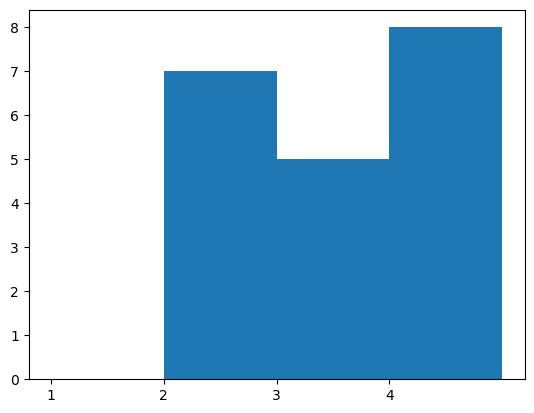

In [16]:
#To look at the frequency distribution, we can use the plt.hist() function
#and we can specify bins
#make sure to check documentation to bin your samples the way you want
plt.hist(control_ranked, bins=[1,2,3,4,5])
#we can adjust x-axis ticks to get it to look how we want
plt.xticks(np.arange(1,5,1))

Text(0, 0.5, 'Frequency')

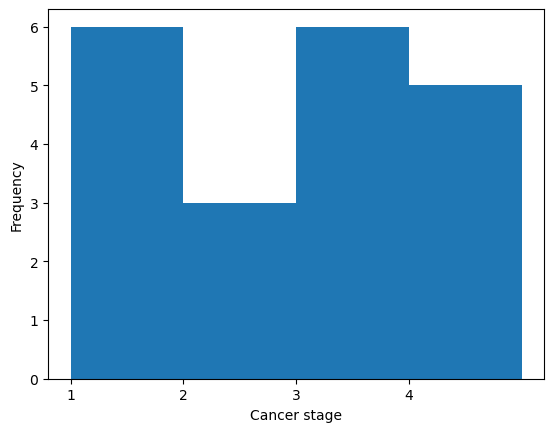

In [17]:
plt.hist(ko_ranked, bins=[1,2,3,4,5])
plt.xticks([1,2,3,4])
#we can also add labels
plt.xlabel('Cancer stage')
plt.ylabel('Frequency')

See if you can update your plot to include your axis titles.

<h1 style="font-size: 40px; margin-bottom: 0px;">Mann-Whitney U test</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

To do a pairwise comparison for our ranked data, we'll make use of the Mann-Whitney U test. This test organizes our data into a table in asceding order, and the samples for each group are assigned a rank value. Then the sum of the rank values for each group are added together to generate a test statistic (**U** for this test). And the test statistic is then used to determine the p-value (kind of like how the t-test results in a **t** test stastistic, which is then used to determine the p-value).

For the Mann-Whitney U test, the null hypothesis is that the distribution of the samples in one group is equal to that of the other group. In other words, it is testing if the two groups are similar to one another. 

In Python, the <mark style="background-color: #EEEEEE;"><strong>scipy.stats</strong></mark> package contains a function that allows us to compute both the test statistic (**U***) and the corresponding p-value. <u><a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html" rel="noopener noreferrer" target="_blank">Documentation for the <mark style="background-color: #EEEEEE;"><strong>scipy.stats.mannwhitneyu()</strong></mark> function can be found here</a></u>.
```
stats.mannwhitneyu(x, y, alternative='two-sided')
```
In our case, our <mark style="background-color: #EEEEEE;"><strong>x</strong></mark> parameter will correspond to our control dataset, while our <mark style="background-color: #EEEEEE;"><strong>y</strong></mark> parameter will correspond to our KO dataset. Since our alternative hypothesis will be that the two groups are not equal, we can leave the <mark style="background-color: #EEEEEE;"><strong>alternative</strong></mark> parameter set to its default value of <mark style="background-color: #EEEEEE;"><strong>'two-sided'</strong></mark>. There are additional parameters that you can adjust depending on your data, and those can be found in the documentation.

For our example, we'll make use of the first two parameters and leave the <mark style="background-color: #EEEEEE;"><strong>alterative</strong></mark> set to its default.

In [18]:
#Again, you'll want to assign the output to a variable, so you can pull specific attributes
ranked_result = stats.mannwhitneyu(control_ranked, ko_ranked)
#In our case, we are interested in the resulting pvalue
print(ranked_result.pvalue)

0.14391400588171008


<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #3 - Nominal data</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

Nominal data are data that does not have a numerical value or some ranked order. These can be thought of as labels that help subdivide samples into groups based on specific characteristics. For example, if we look at our xenograft data from MCB201A, we have a set of tumors that engrafted and a set of tumors that didn't engraft. Moreover, we have a set of tumors that are control and another set that are KOs.

So in essence, we have two nominal variables, both of which comprise of two labels/groups, and our samples can exist as any combination of the two nominal variables.

<h3>1. Create a 2D list that contains the counts for each group</h3>

We can either import a 2x2 table into this notebook, or we can also create a 2x2 list that contains the counts from our xenograft experiment.

The 2x2 table/list will look something like:
<table style="margin-left: 0px;">
    <tr>
        <td style="background-color: None; border: None;">&nbsp;</tD>
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000; width: 75px; text-align: center;">Engraft</td>
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000; width: 75px; text-align: center;">Not engrafted</td>
    </tr>
    <tr>
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000; width: 75px; text-align: center;">Control</td>
        <td style="background-color: #FFFFFF; border: 1px solid; border-color: #000000; width: 75px; text-align: center;">17</td>
        <td style="background-color: #FFFFFF; border: 1px solid; border-color: #000000; width: 75px; text-align: center;">1</td>
    </tr>
    <tr>
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000; width: 75px; text-align: center;">KO</td>
        <td style="background-color: #FFFFFF; border: 1px solid; border-color: #000000; width: 75px; text-align: center;">4</td>
        <td style="background-color: #FFFFFF; border: 1px solid; border-color: #000000; width: 75px; text-align: center;">14</td>
    </tr>
</table>

Where the rows correspond to control vs KO, and the columns correspond to engraft vs not engrafted.

Translating that into a 2x2 list will look like:
```
variable = [[control_engraft, control_not_engrafted], [ko_engraft, ko_not_engrafted]]
```


In [19]:
#Set up a 2x2 list by creating lists within lists
nominal_results = [[17, 1], [4, 14]]
#check to see if things look okay
print(nominal_results)

[[17, 1], [4, 14]]


<h3><u>Challenge:</u> Generate a fake nominal dataset by defining your own function</h3>

For those of you who want a challenge, let's try to generate a set of nominal data for a control group and a KO group, looking at whether or not a tumor engrafted, modeled after the data that we collected from MCB201A. Recall that the raw data simply consists of assigned labels (in our case, either 'engrafted' or 'not engrafted') that don't contain an inherent quantitative value. So what that means for us in Python is that our data will consist of **str** data types.

To set up a function, sometimes it's helpful to work backwards by first asking ourselves what will our final dataset look like (what is the output that we want this function to generate) and work backwards from there, kind of like O-chem:

<strong>For control:</strong>
<table style="margin-left: 0px;">
    <tr>
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000;"><strong>Sample #1</strong></td>
        <td style="background-color: #FFFFFF; border: 1px solid; border-color: #000000; width: 75px; text-align: center;">Engraft</td>
    </tr>
    <tr>
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000;"><strong>Sample #2</strong></td>
        <td style="background-color: #FFFFFF; border: 1px solid; border-color: #000000; width: 75px; text-align: center;">Engraft</td>
    </tr>
    <tr>
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000;"><strong>Sample #3</strong></td>
        <td style="background-color: #FFFFFF; border: 1px solid; border-color: #000000; width: 75px; text-align: center;">Not engraft</td>
    </tr>
    <tr>
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000;"><strong>Sample #4</strong></td>
        <td style="background-color: #FFFFFF; border: 1px solid; border-color: #000000; width: 75px; text-align: center;">Engraft</td>
    </tr>
    <tr>
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000;"><strong>Sample #5</strong></td>
        <td style="background-color: #FFFFFF; border: 1px solid; border-color: #000000; width: 75px; text-align: center;">Engraft</td>
    </tr>
    <tr>
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000;"><strong>Sample #6</strong></td>
        <td style="background-color: #FFFFFF; border: 1px solid; border-color: #000000; width: 75px; text-align: center;">Engraft</td>
    </tr>
</table>

Our dataset looks like a pandas Series, where each element corresponds to a different sample's nominal data point. So what we need to be able to do is to generate two labels for our dataset, create a list of both our labels of varying lengths, to create a pandas Series, and also for our function to output a Series.

To accomplish these tasks, we can make use of a number of functions:
<ul>
    <li><a href="https://docs.python.org/3/library/functions.html#func-str" rel="noopener noreferrer" target="_blank"><mark style="background-color: #EEEEEE;"><strong>str()</strong></mark></a> - because we want to create a <strong>str</strong> for our nominal variable</li>
    <li><a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html" rel="noopener noreferrer" target="_blank"><mark style="background-color: #EEEEEE;"><strong>np.random.randint()</strong></mark></a> - so we have some quasi random data to play around with</li>
    <li><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html" rel="noopener noreferrer" target="_blank"><mark style="background-color: #EEEEEE;"><strong>pd.Series()</strong></mark></a> - to convert objects to Series where needed</li>
        <li><a href="https://pandas.pydata.org/docs/reference/api/pandas.concat.html" rel="noopener noreferrer" target="_blank"><mark style="background-color: #EEEEEE;"><strong>pd.concat()</strong></mark></a> - to combine two Series together</li> 
</ul>

So let's try setting up a function below to generate our data set.

In [20]:
#Set up a function to create a random nominal dataset:
def nominal_gen(pos_label, neg_label, posmin=5, posmax=20, negmin=5, negmax=20, N=1):
    """Generate a Series populated with a random number of two label types"""
    pos_group = str(pos_label) #we can even skip this if we just provide strings
    neg_group = str(neg_label) #same for this
    pos_list = pd.Series([pos_group]*(np.random.randint(posmin, posmax, N)[0])) #expand our list by some random number
    neg_list = pd.Series([neg_group]*(np.random.randint(negmin, negmax, N)[0]))
    data = pd.concat([pos_list, neg_list], ignore_index=True) #stick the two lists together
    return data #output the dataframe

#use the function to generate fake dataset for both control and ko
control_fake_nominal = nominal_gen('engraft', 'not_engrafted')
ko_fake_nominal = nominal_gen('engraft', 'not_engrafted')

#Check to make sure everything acts as expected
print(control_fake_nominal)
print(ko_fake_nominal)

0           engraft
1           engraft
2           engraft
3           engraft
4           engraft
5           engraft
6           engraft
7           engraft
8           engraft
9     not_engrafted
10    not_engrafted
11    not_engrafted
12    not_engrafted
13    not_engrafted
14    not_engrafted
15    not_engrafted
16    not_engrafted
17    not_engrafted
18    not_engrafted
19    not_engrafted
20    not_engrafted
21    not_engrafted
22    not_engrafted
23    not_engrafted
24    not_engrafted
25    not_engrafted
26    not_engrafted
27    not_engrafted
dtype: object
0           engraft
1           engraft
2           engraft
3           engraft
4           engraft
5     not_engrafted
6     not_engrafted
7     not_engrafted
8     not_engrafted
9     not_engrafted
10    not_engrafted
11    not_engrafted
12    not_engrafted
13    not_engrafted
dtype: object


<h3><u>Challenge:</u> Create a 2D list based on the fake data generated using your function.</h3>

In [21]:
#We can either specify the position or the exact label to get the counts associated with either engrafted or not engrafted
nominal_fake_table = [[control_fake_nominal.value_counts()['not_engrafted'], control_fake_nominal.value_counts()['engraft']], 
                      [ko_fake_nominal.value_counts()['not_engrafted'], ko_fake_nominal.value_counts()['engraft']]]

print(nominal_fake_table)

print(type(control_fake_nominal.value_counts()))

[[19, 9], [9, 5]]
<class 'pandas.core.series.Series'>


<h1 style="font-size: 40px; margin-bottom: 0px;">Chi-squared test (of independence)</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 750px;"></hr>

One way we can test nominal data is through a Chi-squared test of independence. This test's null hypothesis is that the observed proportions of one group is equal to the observed proportions of another group. In our case, the null hypothesis would be that the proportion of engrafted and non-engrafted control samples is equal to the proportion for KO samples.

Recall our 2x2 table from earlier:
<table style="margin-left: 0px;">
    <tr>
        <td style="background-color: None; border: None;">&nbsp;</tD>
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000; width: 75px; text-align: center;">Engraft</td>
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000; width: 75px; text-align: center;">Not engrafted</td>
    </tr>
    <tr>
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000; width: 75px; text-align: center;">Control</td>
        <td style="background-color: #FFFFFF; border: 1px solid; border-color: #000000; width: 75px; text-align: center;">17</td>
        <td style="background-color: #FFFFFF; border: 1px solid; border-color: #000000; width: 75px; text-align: center;">1</td>
    </tr>
    <tr>
        <td style="background-color: #EEEEEE; border: 1px solid; border-color: #000000; width: 75px; text-align: center;">KO</td>
        <td style="background-color: #FFFFFF; border: 1px solid; border-color: #000000; width: 75px; text-align: center;">4</td>
        <td style="background-color: #FFFFFF; border: 1px solid; border-color: #000000; width: 75px; text-align: center;">14</td>
    </tr>
</table>

This table is called a 2x2 contingency table, whose values are used to determine the **Chi-squared** test statistic. Similar to both the **t** and **U** test statistics, the **Chi-squared** test statistic is used to determine the p-value.

Using the <mark style="background-color: #EEEEEE;"><strong>scipy.stats.chi2_contingency()</strong></mark> function, we can have Python perform a Chi-squared test of independence on our contingency table and return both the **Chi-squared** test statistic and the resulting p-value. <u><a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html" rel="noopener noreferrer" target="_blank">Documentation is here</a></u>.

How that will look like in practice is:
```
variable = stats.chi2_contingency(contingency_table)
```

And like with our previous statistical tests, the result that it outputs will have two attributes. The first attribute is the test statistic <mark style="background-color: #EEEEEE;"><strong>statistic</strong></mark>, and the second attribute is the corresponding p-value <mark style="background-color: #EEEEEE;"><strong>pvalue</strong></mark>.

We can have Python return the specific attribute:
```
print(variable.pvalue)
```
In this case, Python will output the p-value of our Chi-squared test of independence.

In [22]:
#Assign output of statistical test to variable to pull pvalue
real_nominal_result = stats.chi2_contingency(nominal_results)

print(real_nominal_result.pvalue)

fake_nominal_result = stats.chi2_contingency(nominal_fake_table)

print(fake_nominal_result.pvalue)

4.976233487907417e-05
1.0


<h1 style="font-size: 40px; margin-bottom: 0px;">Fisher's exact test</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

We can also make use of the Fisher's exact test to perform pair-wise comparisons between nominal data sets. This is generally recommended especially if your sample sizes are small. And the set up is the same as the one we used for the Chi-squared test of independence, so we can use the same contingency table.

The function is similarly set up:
```
variable = stats.fisher_exact(contingency_table)
```

This function is restricted to a 2x2 contingency table, and the null hypothesis is that the proportions are equal between the two nominal variables. It will output a result that contains two attributes, the odds ratio and the p-value, like our previous statistical tests. And we can pull those attributes out of the variable to which we assigned our results.
```
print(variable.pvalue)
```

In [23]:
exact_nominal_result = stats.fisher_exact(nominal_results)

print(exact_nominal_result.pvalue)

fake_exact_nominal_result = stats.fisher_exact(nominal_fake_table)

print(fake_exact_nominal_result.pvalue)

2.0077937570804042e-05
1.0


<h1 style="font-size: 40px; margin-bottom: 0px;">Guided plotting demo</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

Yesterday, I mentioned that we'll learn how to create a commonly encountered type of plot called a swarm plot with descriptive statistics overlaid on top of the swarm plot.

<h2>Setting up to fine tune figures and plots</h2>

To allow us to have more control over how we are plotting, to access specific attributes of our plots, and to create figures containing subplots, we can make use of the <mark style="background-color: #EEEEEE;"><strong>matplotlib.pyplot.subplots()</strong></mark> function.

So the first line of code that we'll implement in this demo is:
```
fig, ax = plt.subplots()
```
The <mark style="background-color: #EEEEEE;"><strong>matplotlib.pyplot.subplots()</strong></mark> function returns a <mark style="background-color: #EEEEEE;"><strong>fig</strong></mark> and <mark style="background-color: #EEEEEE;"><strong>ax</strong></mark>, which we can assign to similarly named variables, allowing us to modify specific parts of our plots.

<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html" rel="noopener noreferrer" target="_blank"><u>Click for documentation for the <mark style="background-color: #EEEEEE;"><strong>matplotlib.pyplot.subplots()</strong></mark> function</u></a>.

In the code cell below, mess around with the parameters to see how the output figure changes.

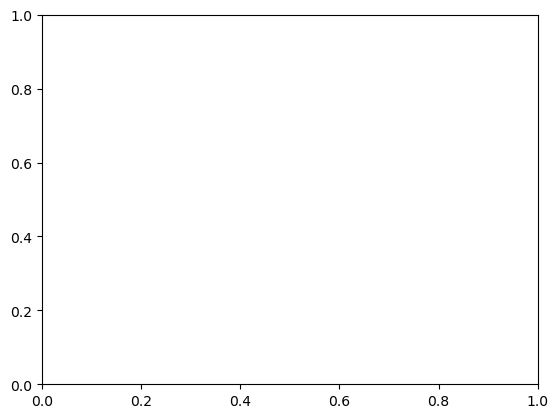

In [24]:
fig, ax = plt.subplots()

You should be able to see that we have empty plots, and by changing parameters around, we can change how the figure looks.

<h2>Prepare a color palette</h2>

We have the freedom to also select the specific color for our data points, and to prepare for this, we can create a list containing strings of color codes.

In [25]:
Color_code = ['#002676', '#FDB515']

<h2>Create a swarmplot</h2>

Matplotlib's ability to create a swarmplot is a bit more limited, so we can make use of our seaborn package, which has a function for us to create a swarmplot. Swarmplots are helpful when you want to show each individual data point, so that the reader has an idea of how the distribution of your data looks by looking directly at the raw data points.

The function that we'll use is the <mark style="background-color: #EEEEEE;"><strong>seaborn.swarmplot()</strong></mark> function. <u><a href="https://seaborn.pydata.org/generated/seaborn.swarmplot.html" rel="noopener noreferrer" target="_blank">Documentation is here</a></u>.

We'll pass our DataFrame through the function to see how it looks like without additional modifications.
```
sns.swarmplot(data=tumor_weights)
```

<Axes: >

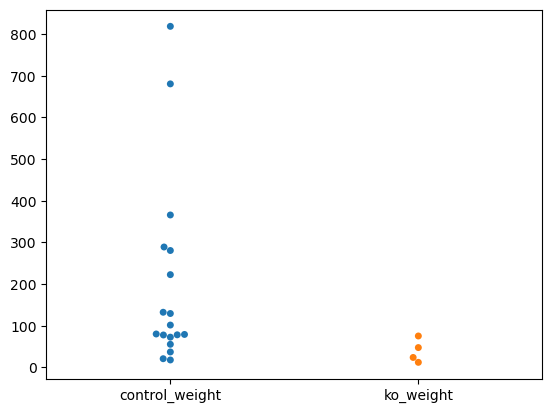

In [26]:
sns.swarmplot(data=tumor_weights)

We can make minor adjustments by passing additional arguments to the function, such as:
<ul>
    <li><mark style="background-color: #EEEEEE;"><strong>s</strong></mark> - the size of our markers</li>
    <li><mark style="background-color: #EEEEEE;"><strong>palette</strong></mark> - color palette for our markers</li>
</ul>

<Axes: >

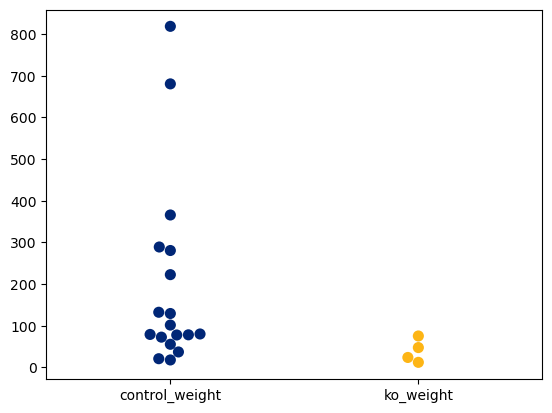

In [27]:
sns.swarmplot(
    data=tumor_weights,
    s=8,
    palette=Color_code
)

You can see that we have the basic swarm plot, but as with our basic plot from last week, there's still a few things missing, such as proper labels for our groups on the X-axis, a Y-axis label, and proper Y-axis limits. Usually, swarmplots also include descriptive statistics that summarize the raw data that is shown, and this can include the mean and error bars denoting the standard deviation or standard error.

Before we start adjusting the axes, let's add in our descriptive statistics overlaid on top of our raw data points.

<h2>Overlay descriptive statistics</h2>

One thing we can do is to overlay plots on top of one another to convey additional information within a single plot without having to create subplots for each thing. This type of approach is helpful when we want to overlay descriptive statistics over our raw data points, so that the reader can see both the raw data as well as the statistics.

Descriptive statistics, such as the mean, can be plotted a few ways, such as a bar graph with error bars or as box-and-whisker plots. Both of these plots contain something that will be helpful to overlay onto our swarmplot. For the bar graph, it contains error bars, and for the box-and-whisker plot, it contains the ability to plot just the mean.

So what we can do is to take the portions of these plots that we like, strip away what we don't want to see, and overlay it onto our swarmplot.

Let's take a look at how these two plots will look like when plotted as a basic function.

<h3>Plot a bar graph to overlay</h3>

We can make use of the <mark style="background-color: #EEEEEE;"><strong>seaborn.barplot()</strong></mark> function and pass our DataFrame to the function to plot. 

<u><a href="https://seaborn.pydata.org/generated/seaborn.barplot.html" rel="noopener noreferrer" target="_blank">Documentation is here</a></u>.

```
seaborn.barplot(data=tumor_weights)
```
Starting with a barplot with no frills, we can pass our DataFrame in as an argument. In this case, we can continue to use our <mark style="background-color: #EEEEEE;"><strong>tumor_weights</strong></mark> dataset.

<Axes: >

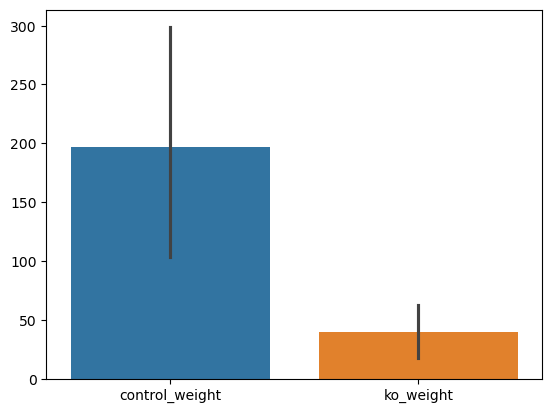

In [28]:
sns.barplot(data=tumor_weights)

You should see a pretty basic bar graph with error bars already plotted. It has what we need, but now we need to strip out the parts that we don't by passing additional arguments through it.

Specifically, we want just the error bars, so we can make use of the following parameters:
<ul>
    <li><mark style="background-color: #EEEEEE;"><strong>data</strong></mark> - we pass our DataFrame to this parameter so it can perform the calculations needed to plot the error bars</li>
    <li><mark style="background-color: #EEEEEE;"><strong>estimator</strong></mark> - we want it to plot the mean since we want our error bars to be centered around the mean of our data. We can pass the <mark style="background-color: #EEEEEE;"><strong>np.mean</strong></mark> function to this parameter</li>
    <li><mark style="background-color: #EEEEEE;"><strong>alpha</strong></mark> - the parameter controlling the opacity of the boxplot bars. By changing this to <mark style="background-color: #EEEEEE;"><strong>0</strong></mark>, we basically hide the bars depicting the mean, leaving only the error bars visisble</li>
    <li><mark style="background-color: #EEEEEE;"><strong>errorbar</strong></mark> - by changing this parameter, we can tell Python if we want our error bars to denote standard deviation or standard error</li>
    <li><mark style="background-color: #EEEEEE;"><strong>capsize</strong></mark> - the horizontal length of our error bars. This also tells Python that we want a horizontal cap (compare to previously, where there was no cap)</li>
    <li><mark style="background-color: #EEEEEE;"><strong>err_kws</strong></mark> - we can pass a dictionary containing key:value pairs to this parameter to further fine tune our plot by mapping the key:value pairs we provide to specific parameters that exist for <u><a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.boxplot.html#matplotlib.axes.Axes.boxplot" rel="noopener noreferrer" target="_blank"><mark style="background-color: #EEEEEE;"><strong>matplotlib.pyplot.boxplot()</strong></mark></a></u>. Click function for documentation.</li>
</ul>

So let's work through each parameter one at a time to see how each change alters our bar plot.

<h4>Define the estimator</h4>

<Axes: >

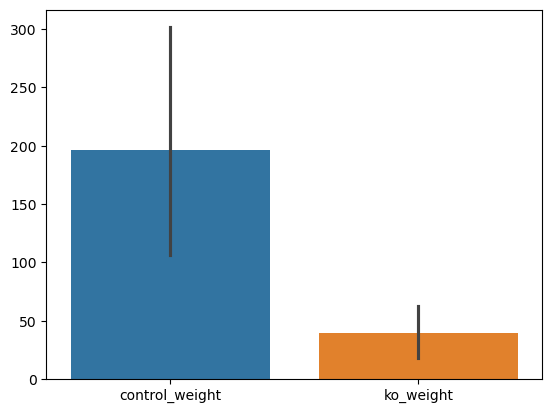

In [29]:
sns.barplot(
    data=tumor_weights,
    estimator=np.mean
)

You can see nothing is changed because by default, the <mark style="background-color: #EEEEEE;"><strong>seaborn.barplot()</strong></mark> function will plot the mean by default.

<h4>Change the opacity to hide the bars</h4>

Now, if we want to hide the bars that depict our mean statistic, we can adjust the argument for <mark style="background-color: #EEEEEE;"><strong>alpha</strong></mark>, which is just another way of saying opacity. For this parameter, the argument that you pass to the function should be between 0 and 1 (inclusive), where 0 is 0% opacity (fully transparent), and 1 is 100% opacity (fully opaque). 

<Axes: >

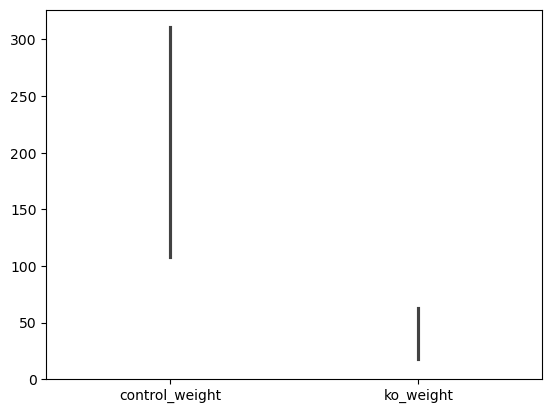

In [30]:
sns.barplot(
    data=tumor_weights,
    estimator=np.mean,
    alpha=0
)

The only things showing now are the error bars, and the error bars need further refining so that we have them denote either the standard deviation or the standard error.

<h4>Update what the error bars denote</h4>

To update the error bars, we can make use of the <mark style="background-color: #EEEEEE;"><strong>errorbar</strong></mark> parameter and provide it with a value <mark style="background-color: #EEEEEE;"><strong>'se'</strong></mark> to denote the standard error. If we wanted the error bars to show the standard deviation, we can use <mark style="background-color: #EEEEEE;"><strong>'sd'</strong></mark> instead.

<Axes: >

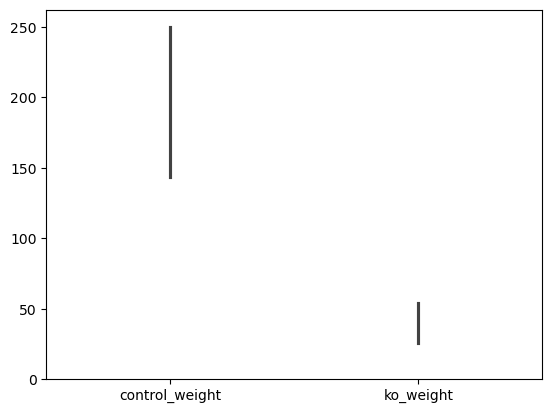

In [31]:
sns.barplot(
    data=tumor_weights,
    estimator=np.mean,
    alpha=0,
    errorbar='se'
)

<h4>Add caps to error bars</h4>

Error bars generally have little horizontal lines at their ends (caps), and we can tell the <mark style="background-color: #EEEEEE;"><strong>seaborn.barplot()</strong></mark> function to add a cap to our error bars by providing it with a value for the <mark style="background-color: #EEEEEE;"><strong>capsize</strong></mark> parameter.

<Axes: >

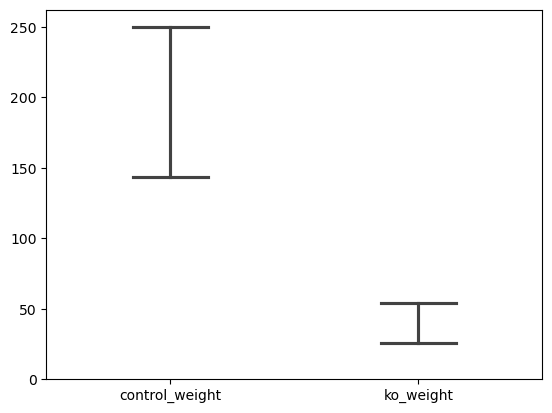

In [32]:
sns.barplot(
    data=tumor_weights,
    estimator=np.mean,
    alpha=0,
    errorbar='se',
    capsize=.3
)

<h4>Further refine error bars</h4>

If we take a look at <u><a href="https://seaborn.pydata.org/generated/seaborn.barplot.html" rel="noopener noreferrer" target="_blank">the documentation for <mark style="background-color: #EEEEEE;"><strong>seaborn.barplot()</strong></mark></a></u>, we can see that there is a parameter that allows us to refine the style of our error bars, called <mark style="background-color: #EEEEEE;"><strong>err_kws</strong></mark>.

By using this parameter, we can pass the arguments we give it to another function called <mark style="background-color: #EEEEEE;"><strong>matplotlib.lines.Line2D</strong></mark> by providing it with a dictionary of keys and values. The keys would correspond to the parameters of the <mark style="background-color: #EEEEEE;"><strong>matplotlib.lines.Line2D</strong></mark> function, such as <mark style="background-color: #EEEEEE;"><strong>linewidth</strong></mark> or <mark style="background-color: #EEEEEE;"><strong>color</strong></mark>. And the values would be the argument for those parameters.

So when specify the <mark style="background-color: #EEEEEE;"><strong>err_kws</strong></mark> argument, you would provide the argument in the form of a dictionary like below:
```
err_kws={'linewidth': 1, 'color': 'black'}
```

This would all be contained within your <mark style="background-color: #EEEEEE;"><strong>seaborn.barplot()</strong></mark> function.

<Axes: >

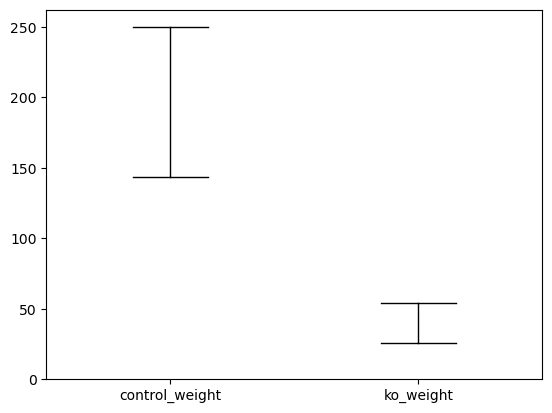

In [33]:
sns.barplot(
    data=tumor_weights,
    estimator=np.mean,
    alpha=0,
    errorbar='se',
    capsize=.3,
    err_kws={'linewidth': 1, 'color': 'black'}
)

<h4>Now let's look at all the plots together on one figure.</h4>

<Axes: >

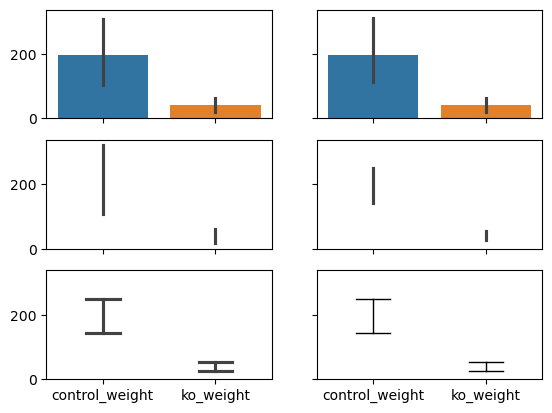

In [34]:
fig, ax = plt.subplots(3, 2, sharey=True, sharex=True)

sns.barplot(
    data=tumor_weights,
    ax=ax[0,0]
)

sns.barplot(
    data=tumor_weights,
    estimator=np.mean,
    ax=ax[0,1]
)

sns.barplot(
    data=tumor_weights,
    estimator=np.mean,
    alpha=0,
    ax=ax[1,0]
)

sns.barplot(
    data=tumor_weights,
    estimator=np.mean,
    alpha=0,
    errorbar='se',
    ax=ax[1,1]
)

sns.barplot(
    data=tumor_weights,
    estimator=np.mean,
    alpha=0,
    errorbar='se',
    capsize=.3,
    ax=ax[2,0]
)

sns.barplot(
    data=tumor_weights,
    estimator=np.mean,
    alpha=0,
    errorbar='se',
    capsize=.3,
    err_kws={'linewidth': 1, 'color': 'black'},
    ax=ax[2,1]
)

So now our error bars look good, and let's use the box-and-whisker plot to get a horizontal line denoting the means of our data.

<h3>Plot a box-and-whisker plot to overlay</h3>

We'll do something similar for a box-and-whisker plot to get it to just show a horizontal line for our means.

We can use the <mark style="background-color: #EEEEEE;"><strong>seaborn.boxplot()</strong></mark> function and pass our same DataFrame to it to plot.

<u><a href="https://seaborn.pydata.org/generated/seaborn.boxplot.html" rel="noopener noreferrer" target="_blank">Documentation is here</a></u>.
```
seaborn.boxplot(data=tumor_weights)
```
We'll start again with a no-frills plot and build up from there.

<Axes: >

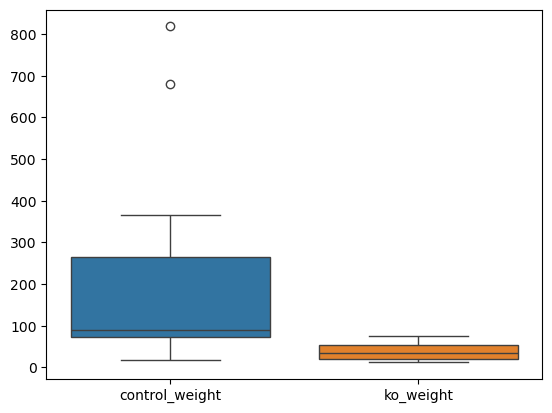

In [35]:
sns.boxplot(
    data=tumor_weights
)

You can see in our boxplot that we have some outliers in our tumor weights. So now with our basic box-and-whisker plot, we'll start making adjustments so that it shows just the mean as a horizontal line. So that way, we can use it as an overlay on top of our swarmplot.

Like with our bar plot, we can make use of the following parameters to just get what we need the plot to depict:
<ul>
    <li><mark style="background-color: #EEEEEE;"><strong>data</strong></mark> - we pass our DataFrame to this parameter so it can perform the calculations needed to plot the error bars</li>
    <li><mark style="background-color: #EEEEEE;"><strong>showmeans</strong></mark> - we want it to plot the mean</li>
    <li><mark style="background-color: #EEEEEE;"><strong>meanline</strong></mark> - we want it to plot a horizontal line for the mean that spans the width of the box of our box-and-whisker plot</li>
    <li><mark style="background-color: #EEEEEE;"><strong>width</strong></mark> - defines the width of our box and therefore also defines the horizontal span of our mean line</li>
    <li><mark style="background-color: #EEEEEE;"><strong>meanprops</strong></mark> - we can pass a dictionary containing key:value pairs to this parameter to refine how we want the mean line to look. Like with <mark style="background-color: #EEEEEE;"><strong>err_kws</strong></mark> for the bar plot, the key:value pairs will be passed to <u><a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.boxplot.html#matplotlib.axes.Axes.boxplot" rel="noopener noreferrer" target="_blank"><mark style="background-color: #EEEEEE;"><strong>matplotlib.pyplot.boxplot()</strong></mark></a></u></li>
    <li><mark style="background-color: #EEEEEE;"><strong>medianprops</strong></mark> - we can pass a dictionary containing key:value pairs to this parameter to remove the median line of our box-and-whisker plot. Works like the <mark style="background-color: #EEEEEE;"><strong>meanprops</strong></mark> parameter</li>
    <li><mark style="background-color: #EEEEEE;"><strong>whiskerprops</strong></mark> - we can pass a dictionary containing key:value pairs to this parameter to remove the whiskers of our box-and-whisker plot. Also works like the <mark style="background-color: #EEEEEE;"><strong>meanprops</strong></mark> parameter</li>
    <li><mark style="background-color: #EEEEEE;"><strong>showfliers</strong></mark> - we can indicate with a Boolean, whether or not we want to hide outliers (fliers)</li>
    <li><mark style="background-color: #EEEEEE;"><strong>showbox</strong></mark> - we can indicate with a Boolean, whether or not we want to hide the box of our box-and-whisker plot</li>
    <li><mark style="background-color: #EEEEEE;"><strong>showcaps</strong></mark> - we can indicate with a Boolean, whether or not we want to the caps</li>
</ul>

Now if we go through each argument and see how the resulting box-and-whisker plot is altered with each parameter:

<h4>Show the mean</h4>

Let's get Python to show our mean by making use of the <mark style="background-color: #EEEEEE;"><strong>showmeans</strong></mark> function. By changing it from the default value of <mark style="background-color: #EEEEEE;"><strong>False</strong></mark> to <mark style="background-color: #EEEEEE;"><strong>True</strong></mark>, which will tell the function that we want it to output the mean in the box-and-whisker plot.

<Axes: >

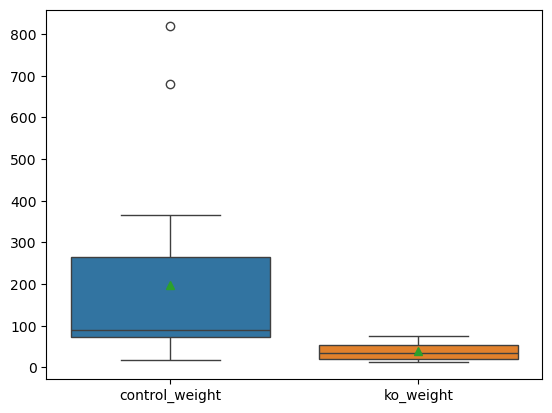

In [36]:
sns.boxplot(
    data=tumor_weights,
    showmeans=True
)

It might be hard to see, but you can see a green triangle representing the mean value for each of our two groups. However, we want our mean to be a horizontal line, so we adjust this with the next parameter.

<h4>Create a horizontal mean line</h4>

Let's change how the mean is depicted from a triangle shape to a horizontal line. To do this, we'll make use of the <mark style="background-color: #EEEEEE;"><strong>meanline</strong></mark> parameters by switching it from it's defaule <mark style="background-color: #EEEEEE;"><strong>False</strong></mark> to <mark style="background-color: #EEEEEE;"><strong>True</strong></mark>.

<Axes: >

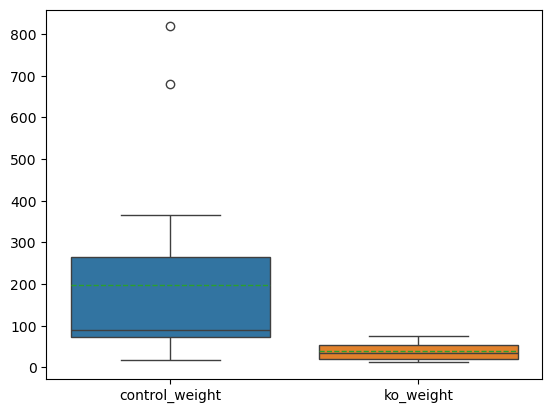

In [37]:
sns.boxplot(
    data=tumor_weights,
    showmeans=True,
    meanline=True
)

This is probably still hard to see, but there is now a green dashed line that denotes where our mean values are. It spans the full width of the box, but we can shorten the length of the line by reducing the width of our boxes.

<h4>Shorten the length of the mean line</h4>

We can have the width of our boxes reduced to also simultaneously reduce the width of our mean line. To do this, we will make use of the <mark style="background-color: #EEEEEE;"><strong>width</strong></mark> parameter.

<Axes: >

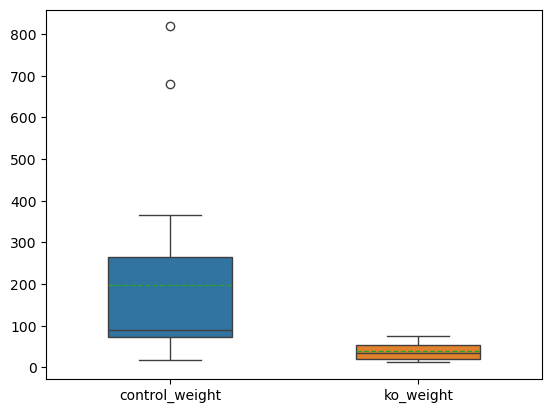

In [38]:
sns.boxplot(
    data=tumor_weights,
    showmeans=True,
    meanline=True,
    width=.5
)

<h4>Refine the mean line</h4>

Now if we want to refine our mean line's style, we can call up the parameter <mark style="background-color: #EEEEEE;"><strong>meanprops</strong></mark>. We can pull up <u><a href="https://seaborn.pydata.org/generated/seaborn.boxplot.html" rel="noopener noreferrer" target="_blank">the documentation of the <mark style="background-color: #EEEEEE;"><strong>seaborn.boxplot()</strong></mark> function</a></u>, where we can find something interesting: a <mark style="background-color: #EEEEEE;"><strong>kwargs</strong></mark> parameter. The documentation specifies that it will pass arguments through to <mark style="background-color: #EEEEEE;"><strong>maplotlib.axes.Axes.boxplot()</strong></mark>, and <u><a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.boxplot.html" rel="noopener noreferrer" target="_blank">if we dive into that documentation</a></u>, we can see that there are a bunch of keywords that we can specify that will be passed to this function. This works similarly to how the <mark style="background-color: #EEEEEE;"><strong>err_kws</strong></mark> worked for our error bars on our boxplot. We'll provide it with a dictionary of keys and values that it will pass through another function, in this case the <mark style="background-color: #EEEEEE;"><strong>maplotlib.axes.Axes.boxplot()</strong></mark> function.

So what we'll pass to our function is a dictionary of keys and values:
```
meanprops = {'color': 'black', 'ls': '-', 'lw':1}
```

<Axes: >

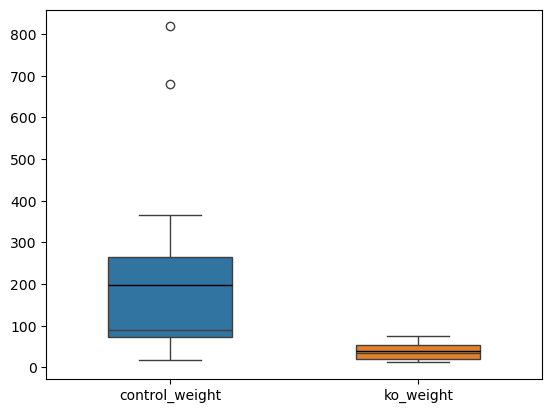

In [39]:
sns.boxplot(
    data=tumor_weights,
    showmeans=True,
    meanline=True,
    width=.5,
    meanprops = {'color': 'black', 'ls': '-', 'lw': 1}
)

Now the mean line is more clearly depicted, but there are still other parts of the box-and-whisker plot that we don't want.

<h4>Remove median line</h4>

Similar to the <mark style="background-color: #EEEEEE;"><strong>meanprops</strong></mark> parameter, we can also make use of the <mark style="background-color: #EEEEEE;"><strong>medianprops</strong></mark> parameter, which will allow us to stylize our median line. In this case, we'll be stylizing the line to hide it.

<Axes: >

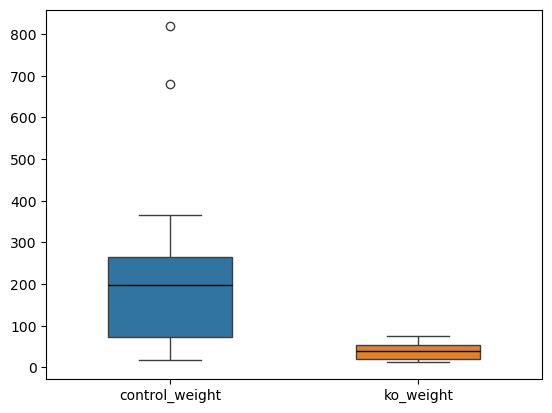

In [40]:
sns.boxplot(
    data=tumor_weights,
    showmeans=True,
    meanline=True,
    width=.5,
    meanprops = {'color': 'black', 'ls': '-', 'lw': 1},
    medianprops = {'visible': False}
)

Now that we've removed the median line, we can clearly see the mean line.

<h4>Remove whiskers</h4>

Now we can do the same with the whiskers by using the <mark style="background-color: #EEEEEE;"><strong>whiskerprops</strong></mark> parameter, and also hiding it like we did with <mark style="background-color: #EEEEEE;"><strong>medianprops</strong></mark>.

<Axes: >

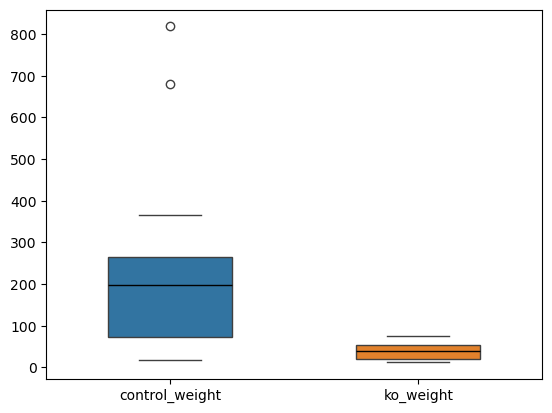

In [41]:
sns.boxplot(
    data=tumor_weights,
    showmeans=True,
    meanline=True,
    width=.5,
    meanprops = {'color': 'black', 'ls': '-', 'lw': 1},
    medianprops = {'visible': False},
    whiskerprops = {'visible': False}
)

<h4>Remove outliers (fliers)</h4>

Since we only want our mean line, we'll also hide the plots of any outliers (fliers) in our data by using the <mark style="background-color: #EEEEEE;"><strong>showfliers</strong></mark> parameter, and switching it to <mark style="background-color: #EEEEEE;"><strong>False</strong></mark>.

<Axes: >

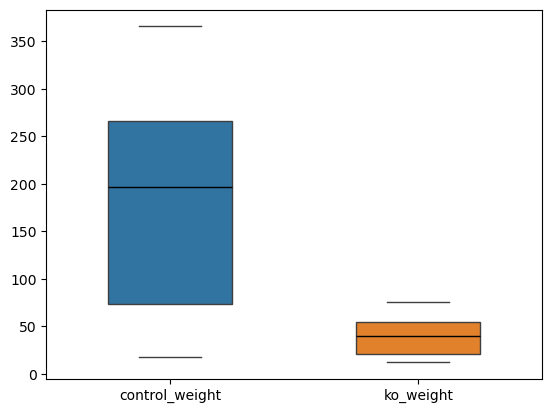

In [42]:
sns.boxplot(
    data=tumor_weights,
    showmeans=True,
    meanline=True,
    width=.5,
    meanprops = {'color': 'black', 'ls': '-', 'lw': 1},
    medianprops = {'visible': False},
    whiskerprops = {'visible': False},
    showfliers=False
)

We're not removing outliers from our dataset, only hiding them in the box-and-whisker plot. And now, we're left with the mean line and the box (which denotes the interquartile range). So all that's left now is to remove the box and the caps.

<h4>Remove the box</h4>

We'll use the <mark style="background-color: #EEEEEE;"><strong>showbox</strong></mark> parameter to remove the box by switching the argument from <mark style="background-color: #EEEEEE;"><strong>True</strong></mark> (default) to <mark style="background-color: #EEEEEE;"><strong>False</strong></mark>.

<Axes: >

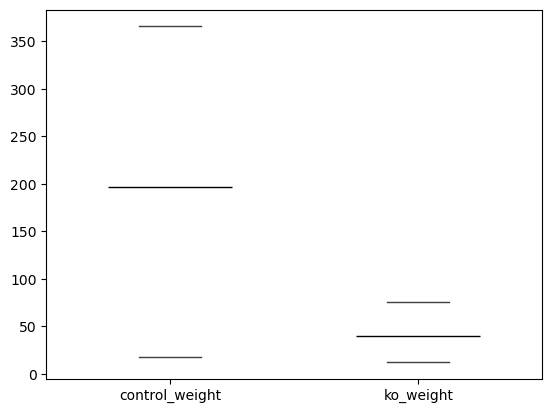

In [43]:
sns.boxplot(
    data=tumor_weights,
    showmeans=True,
    meanline=True,
    width=.5,
    meanprops = {'color': 'black', 'ls': '-', 'lw': 1},
    medianprops = {'visible': False},
    whiskerprops = {'visible': False},
    showfliers=False,
    showbox=False,
)

<h4>Remove the caps</h4>

We'll use the <mark style="background-color: #EEEEEE;"><strong>showcaps</strong></mark> parameter to remove the box by switching the argument from <mark style="background-color: #EEEEEE;"><strong>True</strong></mark> (default) to <mark style="background-color: #EEEEEE;"><strong>False</strong></mark>.

<Axes: >

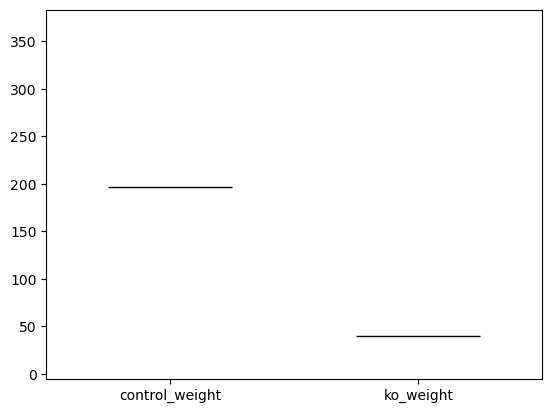

In [44]:
sns.boxplot(
    data=tumor_weights,
    showmeans=True,
    meanline=True,
    width=.5,
    meanprops = {'color': 'black', 'ls': '-', 'lw': 1},
    medianprops = {'visible': False},
    whiskerprops = {'visible': False},
    showfliers=False,
    showbox=False,
    showcaps=False
)

<h4>Now let's look at all the plots together on one figure.</h4>

<Axes: >

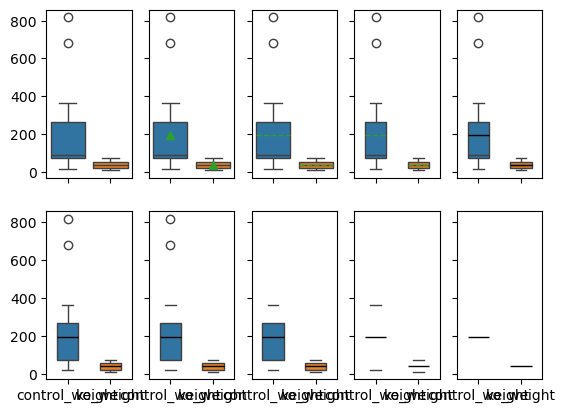

In [45]:
fig, ax = plt.subplots(2, 5, sharey=True, sharex=True)

sns.boxplot(
    data=tumor_weights,
    ax=ax[0,0]
)

sns.boxplot(
    data=tumor_weights,
    showmeans=True,
    ax=ax[0,1]
)

sns.boxplot(
    data=tumor_weights,
    showmeans=True,
    meanline=True,
    ax=ax[0,2]
)

sns.boxplot(
    data=tumor_weights,
    showmeans=True,
    meanline=True,
    width=.5,
    ax=ax[0,3]
)

sns.boxplot(
    data=tumor_weights,
    showmeans=True,
    meanline=True,
    width=.5,
    meanprops = {'color': 'black', 'ls': '-', 'lw': 1},
    ax=ax[0,4]
)

sns.boxplot(
    data=tumor_weights,
    showmeans=True,
    meanline=True,
    width=.5,
    meanprops = {'color': 'black', 'ls': '-', 'lw': 1},
    medianprops = {'visible': False},
    ax=ax[1,0]
)

sns.boxplot(
    data=tumor_weights,
    showmeans=True,
    meanline=True,
    width=.5,
    meanprops = {'color': 'black', 'ls': '-', 'lw': 1},
    medianprops = {'visible': False},
    whiskerprops = {'visible': False},
    ax=ax[1,1]
)


sns.boxplot(
    data=tumor_weights,
    showmeans=True,
    meanline=True,
    width=.5,
    meanprops = {'color': 'black', 'ls': '-', 'lw': 1},
    medianprops = {'visible': False},
    whiskerprops = {'visible': False},
    showfliers=False,
    ax=ax[1,2]
)

sns.boxplot(
    data=tumor_weights,
    showmeans=True,
    meanline=True,
    width=.5,
    meanprops = {'color': 'black', 'ls': '-', 'lw': 1},
    medianprops = {'visible': False},
    whiskerprops = {'visible': False},
    showfliers=False,
    showbox=False,
    ax=ax[1,3]
)

sns.boxplot(
    data=tumor_weights,
    showmeans=True,
    meanline=True,
    width=.5,
    meanprops = {'color': 'black', 'ls': '-', 'lw': 1},
    medianprops = {'visible': False},
    whiskerprops = {'visible': False},
    showfliers=False,
    showbox=False,
    showcaps=False,
    ax=ax[1,4]
)

<h3>Look at all three of our plots side by side</h3>

<Axes: >

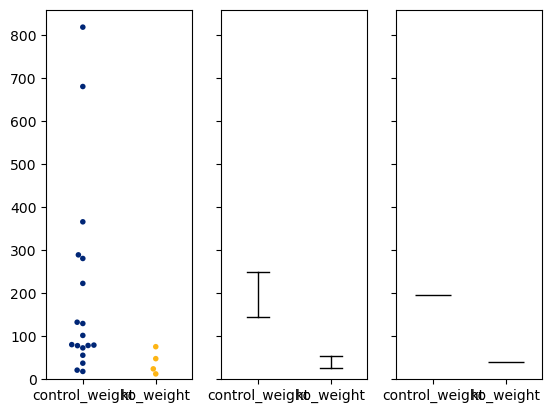

In [46]:
fig, ax = plt.subplots(1, 3, sharey=True)

sns.swarmplot(
    data=tumor_weights,
    s=4,
    palette=Color_code,
    ax=ax[0]
)

sns.barplot(
    data=tumor_weights,
    estimator=np.mean,
    alpha=0,
    errorbar='se',
    capsize=.3,
    err_kws={'linewidth': 1, 'color': 'black'},
    ax=ax[1]
)

sns.boxplot(
    data=tumor_weights,
    showmeans=True,
    meanline=True,
    width=.5,
    meanprops = {'color': 'black', 'ls': '-', 'lw': 1},
    medianprops = {'visible': False},
    whiskerprops = {'visible': False},
    showfliers=False,
    showbox=False,
    showcaps=False,
    ax=ax[2]
)

<h3>Now overlay our plots onto our swarmplot</h3>

<Axes: >

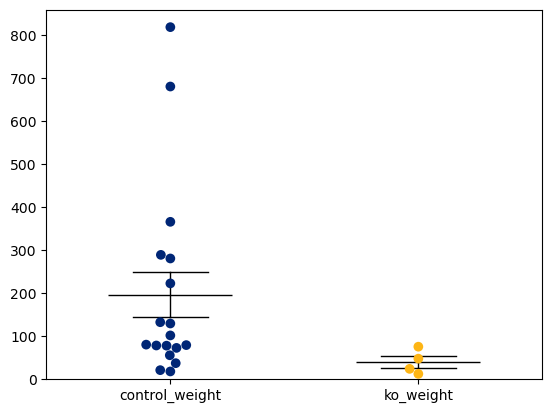

In [47]:
fig, ax = plt.subplots()

sns.swarmplot(
    data=tumor_weights,
    s=7,
    palette=Color_code
)

sns.barplot(
    data=tumor_weights,
    estimator=np.mean,
    alpha=0,
    errorbar='se',
    capsize=.3,
    err_kws={'linewidth': 1, 'color': 'black'}
)

sns.boxplot(
    data=tumor_weights,
    showmeans=True,
    meanline=True,
    width=.5,
    meanprops = {'color': 'black', 'ls': '-', 'lw': 1},
    medianprops = {'visible': False},
    whiskerprops = {'visible': False},
    showfliers=False,
    showbox=False,
    showcaps=False
)

<h4>Re-order the sequence that plots are overlaid</h4>

You can see that our swarmplot is overlaid on top of our descriptive statistics, so we need to change the order in which each plot appears, so that our descriptive statistics are on top. We can do this by passing a <mark style="background-color: #EEEEEE;"><strong>zorder</strong></mark> parameter to our swarmplot to move it under everything else.

<h2>Update labels</h2>

Now our plot is looking much nicer and more like a publication quality figure. However, we still need to update the labels and axis titles!

Since our plot set up is slightly different, we'll pull from slightly different attributes to define what our titles and axes labels will be. The concept is still the same as before, but the exact attribute we're calling is different.

For example, last week we made use of <mark style="background-color: #EEEEEE;"><strong>plt.ylabel()</strong></mark> to change the title of our Y-axis. This time, we can make use of <mark style="background-color: #EEEEEE;"><strong>ax.set_ylabel()</strong></mark> to change the Y-axis title. They both function the same, but since the set-up is slightly different, we'll need to change which attribute we're calling for certain properties.

So it will look like:
```
ax.set_ylabel('Tumor weight (mg)', fontsize=18)
```
With <mark style="background-color: #EEEEEE;"><strong>ax.set_ylabel()</strong></mark>, we can set the title of the Y-axis and also specify the font-size using the <mark style="background-color: #EEEEEE;"><strong>fontsize</strong></mark> parameter.

<h4>Update Y-axis title</h4>

<h4>Update X-axis ticks and tick labels</h4>

We could go back into our data columns and update the header there, which will update the header for our plot. But we can update the X-axis tick labels without needing to go way back into our code.

We will first define our X-axis positions using a list of integers, and then define the labels using the <mark style="background-color: #EEEEEE;"><strong>labels</strong></mark> parameter.
```
ax.set_xticks([0, 1], labels=['Control', '$TAZ$ KO'])
```
Since we have two groups, our list will just consist of 0 and 1, since that's where our two groups are plotted in all our plots, and our list of labels will be at their respective positions. The text flanked by $ will become italicized in the figure.

We can also make use of <mark style="background-color: #EEEEEE;"><strong>plt.xticks()</strong></mark> to adjust the rotation and text alignment, and we can update our Y-axis ticks as well using <mark style="background-color: #EEEEEE;"><strong>plt.yticks()</strong></mark>.

<h2>Setting figure size and resolution</h2>

We have two ways of setting figure size, either at the onset when we first use the <mark style="background-color: #EEEEEE;"><strong>matplotlib.pyplot.subplots()</strong></mark> function, or we can specifically update the figure attribute using <mark style="background-color: #EEEEEE;"><strong>fig.set_size_inches()</strong></mark> function. <u><a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.set_size_inches.html" rel="noopener noreferrer" target="_blank">Documentation is here</a></u>.

We can also improve the resolution of our figure, so it will look good in posters (which have to be blown up to a large size). To do this, we can use the <mark style="background-color: #EEEEEE;"><strong>fig.set_dpi()</strong></mark> function. <u><a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.set_dpi.html#matplotlib.figure.Figure.set_dpi" rel="noopener noreferrer" target="_blank">Documentation is here</a></u>.

<h2>Despine</h2>

One of the benefits of using seaborn is that we can in a single line remove the spines of our plots.
```
sns.despine()
```

We can call up this function and use just the default parameters, so we don't need to specify any arguments.

<h1 style="font-size: 40px; margin-bottom: 0px;">Exporting your plot</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

Now that you have a publication quality plot that you want to include into your paper, grant, or presentation, you can export it as a PDF.
```
fig.savefig('Control_v_TAZ_KO_tumor_weights.pdf', bbox_inches="tight")
```

Next week, we'll review plotting, practice more statistical analyses, and then learn to plot statistical results onto our data.

We'll also then begin diving into creating some basic computational models of biological phenomena.